# Σύγκριση μεθόδων ταξινόμησης

## Προετοιμασία κώδικα

### Πακέτα

In [1]:
import random as rd # Το θέλουμε για τη γεννήτρια τυχαίων αριθμών

import math # Το θέλουμε για την Συγχωνευτική Ταξινόμηση

import timeit # Το θέλουμε για τη χρονομέτρηση των διαδικασιών

from dataclasses import dataclass # Το θέλουμε για τη δομή stuct

from scipy import stats #Το θέλουμε για τη γραμμική παλινδρόμηση
           
import string # Το θέλουμε για ευκολότερη παραγωγή τυχαίων συμβολοσειρών

# Τα κάτωθι είναι για τα γραφήματα
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Βοηθητικά εργαλεία

#### Ακέραιοι

In [3]:
def randomlist(n): # Συνάρτηση που παράγει n τυχαίους ακεραίους στο [1,10^6]
    return [rd.randint(1,1000000) for i in range(1,n+1)]

def decrlist(l): # Συνάρτηση που παράγει τα βήματα της Shell Short
    a = int(input("Give the 'a' of the recursive formula 'h(n-1)=ah(n)+b': "))
    # Προεπιλογή οι δυνάμεις του 2
    if a>1:
        b = int(input("Give the 'b' of the recursive formula 'h(n-1)=ah(n)+b': "))
        if b <0:
            b = 0
    else:
        a = 2
        b = 0
    h = []
    i = 1
    step  = 1
    while step<len(l)-1:
        h.insert(0,step)
        step = a*step+b
        i +=1
    return h

# Συνάρτηση που βρίσκει τη θέση της διαμέρισης (quickSort)
def partition(l, low, high):
 
  # Λαμβάνουμε ως στοιχείο-φρουρό το τελευταίο της λίστας
  pivot = l[high]
 
  # Προσημείωση τελευταίου στοιχείου
  i = low - 1
  
  # Διατρέχουμε όλα τα στοιχεία της λίστας
  # Σύγκριση κάθε στοιχείο με τον φρουρό
  for j in range(low, high):
    if l[j] <= pivot:
      # όταν βρούμε στοιχείο μικρότερο του φρουρού
      # το αντιμεταθέτουμε με το i- στοιχείο
      i = i + 1
      (l[i], l[j]) = (l[j], l[i])
 
  # Αντιμεταθέτουμε τον φρουρό με το επόμενο του i-στοιχείου
  (l[i + 1], l[high]) = (l[high], l[i + 1])
 
  # Επιστρέφουμε την θέση της διαέρισης
  return i + 1


def merge(l, left, middle, right): # Η συνάρτηση-Συγχώνευση
    n1 = middle - left + 1
    n2 = right - middle
    # Φτιάχνουμε δύο λίστες:
    L = [] 
    R = []
    for i in range(0, n1): # μία με το δεξί μέρος της l
        L.append(l[left + i])
    for j in range(0, n2): # και μία με το αριστερό
        R.append(l[middle + 1 + j])
    # Θέτουμε τα τελευταία στοιχεία των L και R ως φρουρούς,
    # για να μην χρειάζεται να ελέγξουμε αν κάποια λίστα έχει εξαντληθεί.
    # Σημειωταίον ότι κάθε αριθμός είναι μικρότερος του απείρου.
    L.append(math.inf) 
    R.append(math.inf)
    i = 0
    j = 0
    # Ελέγχουμε τα τελευταία στοιχείο της κάθε λίστας
    # περί του πιο είναι το μεγαλύτερο
    # και το τοποθετούμε στη νέα λίστα
    for k in range(left,right+1):
        
        if L[i]<=R[j]:
            l[k] = L[i]
            i += 1
        else:
            l[k] = R[j]
            j += 1

def heapify(l, n, i): # Συνάρτηση-αποκατάσταση σωρού μεγίστου
    # Εστιάζουμε στον i κόμβο του διαδικού  δέντρου
    largest = i  
    left = 2 * i + 1    
    right = 2 * i + 2     
    # Έυρεση του μεγαλύτερου θυγατρικού του i κόμβου.
    # Ελέγχουμε:
        # 1. Αν ο i-κόμβος έχει αριστερό δέντρο (left<n)
        # 2. Αν ο θυγατρικός κόμβος είναι μεγαλύτερος του γονικού (l[largest] < l[l])
    if left < n and l[largest] < l[left]:
        largest = left
    # Ελέγχουμε:
        # 1. Αν ο i-κόμβος έχει δεξί δέντρο (left<n)
        # 2. Αν ο θυγατρικός κόμβος είναι μεγαλύτερος του γονικού (l[largest] < l[l])
    # Εφόσον προηγουμένως ο θυγατρικός ήταν μεγαλύτερος,
    # η μεταβλητή largest θα πάρει την τιμή τυο θυγατρικού
    if right < n and l[largest] < l[right]:
        largest = right
    # Αν τελικά ο γονικός δεν ήταν ο μεγαλύτερος,
    # τον αντιμεταθέτουμε με τον μεγαλύτερο θυγατρικό,
    # ο δείκτης του οποίου προέκυψε από τους δύο προηγούμενυς ελέγχους
    if largest != i:
        l[i], l[largest] = l[largest], l[i]  # Σύντομη αντιμετάθεση στην python
        # Επαναλαμβάνουμε τη διαδικασία για τα υποδέντρα.
        heapify(l, n, largest)

# Μια συντόμευση για τα θηκογράμματα στο τέλος
def appendTime(l,i,i0,s1,s2):
    if (i == i0):
        l.append(1000*(s2-s1))

#### Κλάσεις

In [5]:
# Συνάρτηση που βρίσκει τη θέση της διαμέρισης (Quick_struct_Sort)
def partition_struct(l, low, high):
 
  # Λαμβάνουμε ως στοιχείο-φρουρό το τελευταίο της λίστας
  pivot = l[high]
 
  # Προσημείωση τελευταίου στοιχείου
  i = low - 1
  
  # Διατρέχουμε όλα τα στοιχεία της λίστας
  # Σύγκριση κάθε στοιχείο με τον φρουρό
  for j in range(low, high):
    if l[j].myint <= pivot.myint:
      # όταν βρούμε στοιχείο μικρότερο του φρουρού
      # το αντιμεταθέτουμε με το i- στοιχείο
      i = i + 1
      (l[i], l[j]) = (l[j], l[i])
 
  # Αντιμεταθέτουμε τον φρουρό με το επόμενο του i-στοιχείου
  (l[i + 1], l[high]) = (l[high], l[i + 1])
 
  # Επιστρέφουμε την θέση της διαέρισης
  return i + 1

def Merge_struct(l, left, middle, right): # Η συνάρτηση-Συγχώνευση
    n1 = middle - left + 1
    n2 = right - middle
    # Φτιάχνουμε δύο λίστες κλάσεων:
    L = [] 
    R = []
    for i in range(0, n1): # μία με το δεξί μέρος της l
        L.append(l[left + i])
    for j in range(0, n2): # και μία με το αριστερό
        R.append(l[middle + 1 + j])
    # Θέτουμε τα τελευταία στοιχεία των L και R ως φρουρούς,
    # για να μην χρειάζεται να ελέγξουμε αν κάποια λίστα έχει εξαντληθεί.
    # Σημειωταίον ότι κάθε αριθμός είναι μικρότερος του απείρου.
    infEntry = entryClass(math.inf, "k", "d", "m")
    L.append(infEntry) 
    R.append(infEntry)
    i = 0
    j = 0
    # Ελέγχουμε τα τελευταία στοιχείο της κάθε λίστας
    # περί του πιο είναι το μεγαλύτερο
    # και το τοποθετούμε στη νέα λίστα
    for k in range(left,right+1):
        
        if L[i].myint<=R[j].myint:
            l[k] = L[i]
            i += 1
        else:
            l[k] = R[j]
            j += 1



def Heapify_struct(l, n, i): # Συνάρτηση-αποκατάσταση σωρού μεγίστου
    # Εστιάζουμε στον i κόμβο του διαδικού  δέντρου
    largest = i  
    left = 2 * i + 1    
    right = 2 * i + 2     
    # Έυρεση του μεγαλύτερου θυγατρικού του i κόμβου.
    # Ελέγχουμε:
        # 1. Αν ο i-κόμβος έχει αριστερό δέντρο (left<n)
        # 2. Αν ο θυγατρικός κόμβος είναι μεγαλύτερος του γονικού (l[largest] < l[l])
    if left < n and l[largest].myint < l[left].myint:
        largest = left
    # Ελέγχουμε:
        # 1. Αν ο i-κόμβος έχει δεξί δέντρο (left<n)
        # 2. Αν ο θυγατρικός κόμβος είναι μεγαλύτερος του γονικού (l[largest] < l[l])
    # Εφόσον προηγουμένως ο θυγατρικός ήταν μεγαλύτερος,
    # η μεταβλητή largest θα πάρει την τιμή τυο θυγατρικού
    if right < n and l[largest].myint < l[right].myint:
        largest = right
    # Αν τελικά ο γονικός δεν ήταν ο μεγαλύτερος,
    # τον αντιμεταθέτουμε με τον μεγαλύτερο θυγατρικό,
    # ο δείκτης του οποίου προέκυψε από τους δύο προηγούμενυς ελέγχους
    if largest != i:
        l[i], l[largest] = l[largest], l[i]  # Σύντομη αντιμετάθεση στην python
        # Επαναλαμβάνουμε τη διαδικασία για τα υποδέντρα.
        Heapify_struct(l, n, largest)

### Ταξινομήσεις

#### Ακέραιοι

In [7]:
def selectionSort(l):
    for k in range(0,len(l)-1):
        minimum = l[k]
        flag = k
        # Ψάχνουμε τον μικρότερο του τελευταίου
        # μέρους της λίστας και τελικά τον φαίντουμε κάτω.
        for i in range(k+1,len(l)): 
            if l[i]<minimum:
                minimum = l[i]
                flag = i
        temp = l[flag]
        l[flag] = l[k]
        l[k] = temp
    return l

def insertionSort(l):
    for k in range(1,len(l)):
        maximum = l[k]
        # Κάθε μεγαλύτερο l[t] αντιγράφεται 
        # στο l[t+1] και τη θέση του παίρνει το l[k]
        for i in range(k,0,-1):
            if maximum < l[i-1]:
                l[i] = l[i-1]
                l[i-1] = maximum
    return l

def bubbleSort(l):
    # Οι αντιμεταθέσεις αρχικά φθάνουν μέχρι τέλους και κατόπιν μειώνονται
    for k in range(len(l)-1,0,-1):
        # Διατρέχουμε όλο το διάστημα που δεν έχει διαταχθεί και ανεβάζουμε
        # πάνω τη φυσααλίδα
        for i in range(1,k+1):
            if l[i-1]>l[i]:
                temp = l[i-1]
                l[i-1] = l[i]
                l[i] = temp
    return l

def bubbleSort_opt(l):
    for k in range(len(l)-1,0,-1):
        # Επισήμανση ύπαρξης διάταξης μέχρι αποδείξεως του εναντίου
        is_sorted = True 
        for i in range(1,k+1):
            if l[i-1]>l[i]:
                temp = l[i-1]
                l[i-1] = l[i]
                l[i] = temp
                # Απεδήχθη ότι δεν υπάρχει διάταξη, άρα το επισημαίνουμε
                is_sorted = False 
        # Αν όντως ήταν όλα διατεταγμένα, τότε σταματάμε
        if is_sorted:
            break
    return l

def bubbleSort_shake(l):
    is_sorted = False # Επισήμανση διάταξης
    start = 0 # Αρχή διαστήματος επεξεργασίας
    end = len(l)-1 # Τέλος διαστήματος επεξεργασίας
    while (is_sorted == False):
        # Επισήμανση ύπαρξης διάταξης μέχρι αποδείξεως του εναντίου
        is_sorted = True
        # Η φυσσαλίδα ανεβαίνει μέχρι το τέρμα (end), κλασσικά
        for i in range(start, end):
            if (l[i] > l[i + 1]):
                l[i], l[i + 1] = l[i + 1], l[i]
                is_sorted = False
        # Αν όντως ήταν όλα διατεταγμένα, τότε σταματάμε
        if (is_sorted == True):
            break
        # Διαφορετικά, επανεπισήμανση ύπαρξης διάταξης
        # μέχρι αποδείξεως του εναντίου
        is_sorted = True
 
        # Αφού η φυσσαλίδα έφτασε στην κορυφή,
        # το διάστημα μελέτης περιορίζεται κατά 1 λιγότερο
        end = end-1
        # Το ελάχιστο κατεβαίνει κάτω (κατακάθι)
        for i in range(end-1, start-1, -1):
            if (l[i] > l[i + 1]):
                l[i], l[i + 1] = l[i + 1], l[i]
                is_sorted = False
 
        # Αφού το κατακάθι έφρασε στον πάτο,
        # το διάστημα μελέτης περιορίζεται κατά 1 λιγότερο
        start = start + 1
        # Αν όντως ήταν όλα διατεταγμένα, τότε ο βρόχος while τερματίζεται.
        # Εξ ου και αρχικά γράψαμε is_sorted = False,
        # ώστε να εισαχθούμε εντός του

def shellSort(l,h):
    fst = 0 # Πρώτο στοιχείο ζευγαριού σύγκρισης
    i = 0 # Δείκτης των αποστάσεων h
    while (i < len(h)): # Όσο, δηλαδή, ορίζεται η h
        snd = fst+h[i] # Δεύτερο στοιχείο ζευγαριού σύγκρισης
        while (snd < len(l)): # Ώστε να μην ξεπαρνάμε τη λίστα l
            if l[fst]>l[snd]: # Αντιμετάθεση λάθος διατεταγμένων
                temp = l[fst]
                l[fst]=l[snd]
                l[snd]=temp
            fst +=1 # Ένα βήμα μπροστά έκαστο
            snd +=1
        fst = 0 # Ξανά από την αρχή
        i +=1        
    return l

def shellSort2(l):
    fst = 0 # Πρώτο στοιχείο ζευγαριού σύγκρισης
    h = len(l)//2 # Δείκτης των αποστάσεων h
    while (h >= 1): # Όσο, δηλαδή, ορίζονται συγκρίσεις ζευγών
        snd = fst+h # Δεύτερο στοιχείο ζευγαριού σύγκρισης
        while (snd < len(l)): # Ώστε να μην ξεπαρνάμε τη λίστα l
            if l[fst]>l[snd]: # Αντιμετάθεση λάθος διατεταγμένων
                temp = l[fst]
                l[fst]=l[snd]
                l[snd]=temp
            fst +=1 # Ένα βήμα μπροστά έκαστο
            snd +=1
        fst = 0 # Ξανά από την αρχή
        h //=2        
    return l

def quickSort(l, low=0, high=None):
  # Η παρακάτω εντολές είναι για νε θεωρηθεί προεπιλογή
  # το left=0 και το right = τελευταίο_στοιχείο
  if high == None:
     high=len(l)-1
  if low < high:
 
    # Βρίσκουμε στοιχείο-φρουρό τέτοιο, ώστε:
    # τα στοιχεία τα μικρότερα του φρουρού να είναι στ' αριστερά
    # τα στοιχεία τα μεγαλύτερα του φρουρού να είναι στα δεξιά
    pi = partition(l, low, high)
 
    # Καλούμε αναδρομικά την quickSort αριστερά και δεξιά του φρουρού
    quickSort(l, low, pi - 1)
    quickSort(l, pi + 1, high)

def mergeSort(l, left=None, right=None):
    # Η παρακάτω εντολές είναι για νε θεωρηθεί προεπιλογή
    # το left=0 και το right = τελευταίο_στοιχείο
    if (left==None and right==None):
        left=0
        right=len(l)-1
    if left < right:
        # Χωρίζουμε τη λίστα σε δύο κομμάτια
        middle = (left+right)//2
        # Ταξινομούμε το πρώτο μισό
        mergeSort(l, left, middle)
        # Ταξινομούμε το δεύτερο μισό
        mergeSort(l, middle+1, right)
        # Τα ενώνουμε
        merge(l, left, middle, right) 

def heapSort(l):
    n = len(l)
    # Κατασκευή σωρού μεγίσοτου.
    for i in range(n//2 - 1, -1, -1):
        heapify(l, n, i)
    # Εξαγωγη στοιχείων ένα-προς-ένα
    for i in range(n-1, 0, -1):
        l[i], l[0] = l[0], l[i]  # Σύντομη αντιμετάθεση στην python
        heapify(l, i, 0)                                                  # με τον φρουρό ενδιάμεσα

#### Κλάσεις

In [9]:
def Selection_struct_Sort(l):
    for k in range(0,len(l)-1):
        minimum = l[k]
        flag = k
        # Ψάχνουμε τον μικρότερο του τελευταίου
        # μέρους της λίστας και τελικά τον φαίντουμε κάτω.
        for i in range(k+1,len(l)): 
            if l[i].myint < minimum.myint:
                minimum = l[i]
                flag = i
        temp = l[flag]
        l[flag] = l[k]
        l[k] = temp
    return l

def Insertion_struct_Sort(l):
    for k in range(1,len(l)):
        maximum = l[k]
        # Κάθε μεγαλύτερο l[t] αντιγράφεται 
        # στο l[t+1] και τη θέση του παίρνει το l[k]
        for i in range(k,0,-1):
            if maximum.myint < l[i-1].myint:
                l[i] = l[i-1]
                l[i-1] = maximum
    return l

def Bubble_struct_Sort(l):
    # Οι αντιμεταθέσεις αρχικά φθάνουν μέχρι τέλους και κατόπιν μειώνονται
    for k in range(len(l)-1,0,-1):
        # Διατρέχουμε όλο το διάστημα που δεν έχει διαταχθεί και ανεβάζουμε
        # πάνω τη φυσααλίδα
        for i in range(1,k+1):
            if l[i-1].myint>l[i].myint:
                temp = l[i-1]
                l[i-1] = l[i]
                l[i] = temp
    return l



def Bubble_struct_Sort_opt(l):
    for k in range(len(l)-1,0,-1):
        # Επισήμανση ύπαρξης διάταξης μέχρι αποδείξεως του εναντίου
        is_Sorted = True 
        for i in range(1,k+1):
            if l[i-1].myint>l[i].myint:
                temp = l[i-1]
                l[i-1] = l[i]
                l[i] = temp
                # Απεδήχθη ότι δεν υπάρχει διάταξη, άρα το επισημαίνουμε
                is_Sorted = False 
        # Αν όντως ήταν όλα διατεταγμένα, τότε σταματάμε
        if is_Sorted:
            break
    return l

def Bubble_struct_Sort_shake(l):
    is_Sorted = False # Επισήμανση διάταξης
    start = 0 # Αρχή διαστήματος επεξεργασίας
    end = len(l)-1 # Τέλος διαστήματος επεξεργασίας
    while (is_Sorted == False):
        # Επισήμανση ύπαρξης διάταξης μέχρι αποδείξεως του εναντίου
        is_Sorted = True
        # Η φυσσαλίδα ανεβαίνει μέχρι το τέρμα (end), κλασσικά
        for i in range(start, end):
            if (l[i].myint > l[i + 1].myint):
                l[i], l[i + 1] = l[i + 1], l[i]
                is_Sorted = False
        # Αν όντως ήταν όλα διατεταγμένα, τότε σταματάμε
        if (is_Sorted == True):
            break
        # Διαφορετικά, επανεπισήμανση ύπαρξης διάταξης
        # μέχρι αποδείξεως του εναντίου
        is_Sorted = True
 
        # Αφού η φυσσαλίδα έφτασε στην κορυφή,
        # το διάστημα μελέτης περιορίζεται κατά 1 λιγότερο
        end = end-1
        # Το ελάχιστο κατεβαίνει κάτω (κατακάθι)
        for i in range(end-1, start-1, -1):
            if (l[i].myint > l[i + 1].myint):
                l[i], l[i + 1] = l[i + 1], l[i]
                is_Sorted = False
 
        # Αφού το κατακάθι έφρασε στον πάτο,
        # το διάστημα μελέτης περιορίζεται κατά 1 λιγότερο
        start = start + 1
        # Αν όντως ήταν όλα διατεταγμένα, τότε ο βρόχος while τερματίζεται.
        # Εξ ου και αρχικά γράψαμε is_Sorted = False,
        # ώστε να εισαχθούμε εντός του


def Shell_struct_Sort2(l):
    fst = 0 # Πρώτο στοιχείο ζευγαριού σύγκρισης
    h = len(l)//2 # Δείκτης των αποστάσεων h
    while (h >= 1): # Όσο, δηλαδή, ορίζονται συγκρίσεις ζευγών
        snd = fst+h # Δεύτερο στοιχείο ζευγαριού σύγκρισης
        while (snd < len(l)): # Ώστε να μην ξεπαρνάμε τη λίστα l
            if l[fst].myint>l[snd].myint: # Αντιμετάθεση λάθος διατεταγμένων
                temp = l[fst]
                l[fst]=l[snd]
                l[snd]=temp
            fst +=1 # Ένα βήμα μπροστά έκαστο
            snd +=1
        fst = 0 # Ξανά από την αρχή
        h //=2        
    return l


def Quick_struct_Sort(l, low=0, high=None):
  # Η παρακάτω εντολές είναι για νε θεωρηθεί προεπιλογή
  # το left=0 και το right = τελευταίο_στοιχείο
  if high == None:
     high=len(l)-1
  if low < high:
 
    # Βρίσκουμε στοιχείο-φρουρό τέτοιο, ώστε:
    # τα στοιχεία τα μικρότερα του φρουρού να είναι στ' αριστερά
    # τα στοιχεία τα μεγαλύτερα του φρουρού να είναι στα δεξιά
    pi = partition_struct(l, low, high)
 
    # Καλούμε αναδρομικά την Quick_struct_Sort αριστερά και δεξιά του φρουρού
    Quick_struct_Sort(l, low, pi - 1)
    Quick_struct_Sort(l, pi + 1, high)


def Merge_struct_Sort(l, left=None, right=None):
    # Η παρακάτω εντολές είναι για νε θεωρηθεί προεπιλογή
    # το left=0 και το right = τελευταίο_στοιχείο
    if (left==None and right==None):
        left=0
        right=len(l)-1
    if left < right:
        # Χωρίζουμε τη λίστα σε δύο κομμάτια
        middle = (left+right)//2
        # Ταξινομούμε το πρώτο μισό
        Merge_struct_Sort(l, left, middle)
        # Ταξινομούμε το δεύτερο μισό
        Merge_struct_Sort(l, middle+1, right)
        # Τα ενώνουμε
        Merge_struct(l, left, middle, right) 




def Heap_struct_Sort(l):
    n = len(l)
    # Κατασκευή σωρού μεγίσοτου.
    for i in range(n//2 - 1, -1, -1):
        Heapify_struct(l, n, i)
    # Εξαγωγη στοιχείων ένα-προς-ένα
    for i in range(n-1, 0, -1):
        l[i], l[0] = l[0], l[i]  # Σύντομη αντιμετάθεση στην python
        Heapify_struct(l, i, 0)  

### Κύριο πρόγραμμα

In [11]:
sumSelectionS = [0]*10
sumInsertionS = [0]*10
sumBubbleS = [0]*10
sumShellS = [0]*10
sumQuickS = [0]*10
sumMergeS = [0]*10
sumHeapS = [0]*10

# Λίστες που δείχνουν τους διάφορους χρόνους ταξινόμησης i στοιχείων
timeSelectionS = []
timeInsertionS = []
timeBubbleS = []
timeShellS = []
timeQuickS = []
timeMergeS = []
timeHeapS = []

# Εδώ γίνεται μία τριπλή καταχώρηση (struct)
@dataclass
class entryClass:
    myint: int
    mystr1: str
    mystr2: str
    mystr3: str
    
# Εδώ γίνονται 100 καταχωρήσεις
letters = string.ascii_letters
#myf = open("Entries.txt","w")

## Εισαγωγή

Στην εργασία αυτή θα μελετήσουμε την ταχύτητα διαφόρων μεθόδων
ταξινόμησης. Οι λίστες που θα ταξινομηθούν θα είναι δύο ειδών:

* Λίστες που περιέχουν ακεραίους αριθμούς (`int`) και
* Λίστες που περιέχουν κλάσεις δεδομένων (`struct`), ένα εκ των
οποίων είναι ακέραιος αριθμός.

Σε κάθε περίπτωση η ταξινόμηση θα βασίζεται στην διάταξη των ακεραίων
αριθμών.

Οι ταξινομήσεις που ορίζονται στο κείμενο είναι οι:

* Ταξινόμηση με επιλογή (`selectionSort`)
  
* Ταξινόμηση με παρεμβολή (`insertionSort`)
  
* Ταξινόμηση με αντιμετάθεση (`bubbleSort`, `bubbleSort_opt` και
`bubbleSort_shake`)

* Ταξινόμηση παρεμβολής με φθίνοντα διαστήματα (`shellSort` και
`shellSort2`)

* Ταξινόμηση με διαμερισμό (`quickSort`)
  
* Ταξινόμηση με συγχώνευση (`mergeSort`)
 
* Ταξινόμηση με σωρό (`heapSort`)


Από αυτές δεν θα μελετηθούν οι `bubbleSort_opt`, `bubbleSort_shake` και `shellSort2`. Παραμένουν όμως ως ορισμένες συναρτήσεις στα τμήματα:

* **Βοηθητικά εργαλεία** και
* **Ταξινομήσεις**
  
του κώδικα.

## Οδηγίες χρήσεως

Όπως αναφέρθηκε προηγουμένως, το πρόγραμμα κατασκευάζει δύο  ειδών λίστες με 100, 200, ..., 1000 στοιχεία.

* Η μία οικογένεια λιστών αποτελείται από ακεραίους (`int`).
* Η άλλη οικογένεια λιστών αποτελείται κλάσεις δεδομένων (`struct`), ένα εκ των οποίων είναι ακέραιος αριθμός.

Αμφότερες οι λίστες ταξινομούνται βάσει των ακεραίων τιμών με την χρήση καθεμίας από τις προαναφερθείσες συναρτήσεις. Κάθε φορά
καταγράφεται ο χρόνος ταξινόμησης. Για να είναι ακριβέστερη η μελέτη, η διαδικασία θα επαναληφθεί αρκετές φορές. Ως εκ τούτου ζητείται από τον χρήστη αρχικά να δηλώσει πόσες επαναλήψεις του πειράματος θέλει να εκτελεσθούν:

In [13]:
tests = int(input("Enter the number of tests: ")) # Αριθμός δοκιμών

Enter the number of tests:  150


Εδώ εμείς συμπληρώσα `150`. ΚμεΚατά συνέπεια θα παραχθούν 150 διαφορετικές λίστες-`int` και 150 διαφορετικές λίστες-`struct`, οι οποίες κάθε φορά θα ταξινομούνται και θα καταγράφεται ο χρόνος ταξινόμησης. Αμέσως μετά επρέπει να επιλέξουμε:

In [15]:
sumSelection_struct_S = [0]*10
sumInsertion_struct_S = [0]*10
sumBubble_struct_S = [0]*10
sumShell_struct_S = [0]*10
sumQuick_struct_S = [0]*10
sumMerge_struct_S = [0]*10
sumHeap_struct_S = [0]*10

# Λίστες που δείχνουν τους διάφορους χρόνους ταξινόμησης i στοιχείων
timeSelection_struct_S = []
timeInsertion_struct_S = []
timeBubble_struct_S = []
timeShell_struct_S = []
timeQuick_struct_S = []
timeMerge_struct_S = []
timeHeap_struct_S = []

print("Box plot for how many items?")
itemsBP = int(input("Select 100, 200,..., 1000 or something else for no: "))

Box plot for how many items?


Select 100, 200,..., 1000 or something else for no:  100


Στο σημείο αυτό ζητείται από τον χρήστη να ορίσει το μέγεθος των λιστών που οι χρόνοι τους θα παρουσιαστούν σε θηκόγραμμα. Οι επιλογές είναι ανάμεσα στους αριθμούς 100, 200, ..., 1000. Εμείς εδώ συμπληρώσαμε 100. Αυτό σημαίνει ότι στα 150 πειράματα που θα εκτελεστούν, θα αποθηκεύονται κάπου ξεχωριστά οι χρόνοι των 100-μελών λιστών (`int` ή `struct`) και στο τέλος θα παρουσιάζονται σε μορφή έξι θηκογραμμάτων, ένα για κάθε μέθοδο ταξινόμησης.

Στην περίπτωση που ο χρήστης δεν επιθυμεί την εμφάνιση θηκογραμμάτων, μπορεί να πληκτρολογίσει έναν οποιονδήποτε αριθμό διάφορο των 100, 200, ..., 1000.

## Συμπεράσματα

Αρχικά παραθέτουμε τον πίνακα που δείχνει τον μέσο χρόν 
ταξινόμησης κάθε μίας λίστας (100-μελούς, 200-μελούς κτλ) για κάθε μία
μέθοδο ταξινόμησαμμα:

In [17]:
print(f"{'SORTING METHOD': <15}  {'NUMBER OF ITEMS': ^15}  {'TYPE OF LIST': ^12}  {'TIME (ms)':>10}")

def randomLists(l_int,l_struct,n):
    
    for ii in range(n):
        t = rd.randint(1,1000000)
        l_int.append(t)
        # Η μεταβλητή t έχει πρακτικά απεριόριστο μέγεθος
        # Οι μεταβλητές, f, s και m, δεν θα ήταν πρακτικό
        # να έχουν απεριόριστο μέγεθος. Τους δώθηκε αυθέρετα 5, 6, 7 αντίστοιχα
        f = [rd.choice(letters) for k in range(5)]
        f = ''.join(f)
        s = [rd.choice(letters) for k in range(6)]
        s = ''.join(s)
        m = [rd.choice(letters) for k in range(7)]
        m = ''.join(m)
        myentry = entryClass(t, f, s, m)
        #myf.write(f'{ii:<2} {myentry.myint:^20} {myentry.mystr1:^7}{myentry.mystr2:^8}{myentry.mystr1:>9}\n')
        l_struct.append(myentry)

time_int = []
time_struct = []
    
for i in range(0,10): # Τα σενάρια του προβλήματος
        
    for j in range(tests):
        """
        Ακέραιοι
        """
        one_random_list_int = []
        one_random_list_struct = []

        randomLists(one_random_list_int, one_random_list_struct, (i+1)*100)
        copy_SelectionS = one_random_list_int.copy()
        copy_InsertionS = one_random_list_int.copy()
        copy_BubbleS = one_random_list_int.copy()
        copy_ShellS = one_random_list_int.copy()
        copy_QuickS = one_random_list_int.copy()
        copy_MergeS = one_random_list_int.copy()
        copy_HeapS = one_random_list_int.copy()
        
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        selectionSort(copy_SelectionS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeSelectionS, (i+1)*100, itemsBP, start, stop)
        sumSelectionS[i] += stop-start
        time_int.append(stop-start)
        
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        insertionSort(copy_InsertionS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeInsertionS, (i+1)*100, itemsBP, start, stop)
        sumInsertionS[i] += stop-start
        time_int.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        bubbleSort_opt(copy_BubbleS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeBubbleS, (i+1)*100, itemsBP, start, stop)
        sumBubbleS[i] += stop-start
        time_int.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        shellSort2(copy_ShellS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeShellS, (i+1)*100, itemsBP, start, stop)
        sumShellS[i] += stop-start
        time_int.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        quickSort(copy_QuickS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeQuickS, (i+1)*100, itemsBP, start, stop)
        sumQuickS[i] += stop-start
        time_int.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        mergeSort(copy_MergeS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeMergeS, (i+1)*100, itemsBP, start, stop)
        sumMergeS[i] += stop-start
        time_int.append(stop-start)
        
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        heapSort(copy_HeapS)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeHeapS, (i+1)*100, itemsBP, start, stop)
        sumHeapS[i] += stop-start
        time_int.append(stop-start)
        
        """
        Κλασεις
        """
               
        copy_Selection_struct_S = one_random_list_struct.copy()
        copy_Insertion_struct_S = one_random_list_struct.copy()
        copy_Bubble_struct_S = one_random_list_struct.copy()
        copy_Shell_struct_S = one_random_list_struct.copy()
        copy_Quick_struct_S = one_random_list_struct.copy()
        copy_Merge_struct_S = one_random_list_struct.copy()
        copy_Heap_struct_S = one_random_list_struct.copy()
        
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Selection_struct_Sort(copy_Selection_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeSelection_struct_S, (i+1)*100, itemsBP, start, stop)
        sumSelection_struct_S[i] += stop-start
        time_struct.append(stop-start)
        
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Insertion_struct_Sort(copy_Insertion_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeInsertion_struct_S, (i+1)*100, itemsBP, start, stop)
        sumInsertion_struct_S[i] += stop-start
        time_struct.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Bubble_struct_Sort_opt(copy_Bubble_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeBubble_struct_S, (i+1)*100, itemsBP, start, stop)
        sumBubble_struct_S[i] += stop-start
        time_struct.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Shell_struct_Sort2(copy_Shell_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeShell_struct_S, (i+1)*100, itemsBP, start, stop)
        sumShell_struct_S[i] += stop-start
        time_struct.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Quick_struct_Sort(copy_Quick_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeQuick_struct_S, (i+1)*100, itemsBP, start, stop)
        sumQuick_struct_S[i] += stop-start
        time_struct.append(stop-start)
                
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Merge_struct_Sort(copy_Merge_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeMerge_struct_S, (i+1)*100, itemsBP, start, stop)
        sumMerge_struct_S[i] += stop-start
        time_struct.append(stop-start)
        
        start = timeit.default_timer() # Έναρξη χρονομέτρησης
        Heap_struct_Sort(copy_Heap_struct_S)
        stop = timeit.default_timer() # Παύση χρονομέτρησης
        # Πίνακας που δείχνει τους διάφορους χρόνους ταξινόμησης (i+1)*100 στοιχείων
        appendTime(timeHeap_struct_S, (i+1)*100, itemsBP, start, stop)
        sumHeap_struct_S[i] += stop-start
        time_struct.append(stop-start)
    
    # Εκτύπωση μέσων χρόνων
    
    """
    Ακέραιοι
    """
    
    sumSelectionS[i] = (sumSelectionS[i]/tests)*1000
    sumInsertionS[i] = (sumInsertionS[i]/tests)*1000
    sumBubbleS[i] = (sumBubbleS[i]/tests)*1000
    sumShellS[i] = (sumShellS[i]/tests)*1000
    sumQuickS[i] = (sumQuickS[i]/tests)*1000
    sumMergeS[i] = (sumMergeS[i]/tests)*1000
    sumHeapS[i] = (sumHeapS[i]/tests)*1000
    
    print(f"{'Selection Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumSelectionS[i]:>10.2f}")
    print(f"{'Insertion Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumInsertionS[i]:>10.2f}")
    print(f"{'Bubble Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumBubbleS[i]:>10.2f}")
    print(f"{'Shell Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumShellS[i]:>10.2f}")
    print(f"{'Quick Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumQuickS[i]:>10.2f}")
    print(f"{'Merge Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumMergeS[i]:>10.2f}")
    print(f"{'Heap Sort': <15}  {(i+1)*100: ^15}  {'int': ^12}  {sumHeapS[i]:>10.2f}")
    
    
    """
    Κλάσεις
    """
    sumSelection_struct_S[i] = (sumSelection_struct_S[i]/tests)*1000
    sumInsertion_struct_S[i] = (sumInsertion_struct_S[i]/tests)*1000
    sumBubble_struct_S[i] = (sumBubble_struct_S[i]/tests)*1000
    sumShell_struct_S[i] = (sumShell_struct_S[i]/tests)*1000
    sumQuick_struct_S[i] = (sumQuick_struct_S[i]/tests)*1000
    sumMerge_struct_S[i] = (sumMerge_struct_S[i]/tests)*1000
    sumHeap_struct_S[i] = (sumHeap_struct_S[i]/tests)*1000
    
    print(f"{'Selection Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumSelection_struct_S[i]:>10.2f}")
    print(f"{'Insertion Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumInsertion_struct_S[i]:>10.2f}")
    print(f"{'Bubble Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumBubble_struct_S[i]:>10.2f}")
    print(f"{'Shell Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumShell_struct_S[i]:>10.2f}")
    print(f"{'Quick Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumQuick_struct_S[i]:>10.2f}")
    print(f"{'Merge Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumMerge_struct_S[i]:>10.2f}")
    print(f"{'Heap Sort': <15}  {(i+1)*100: ^15}  {'struct': ^12}  {sumHeap_struct_S[i]:>10.2f}")

SORTING METHOD   NUMBER OF ITEMS  TYPE OF LIST   TIME (ms)
Selection Sort         100            int             0.21
Insertion Sort         100            int             0.33
Bubble Sort            100            int             0.42
Shell Sort             100            int             0.06
Quick Sort             100            int             0.14
Merge Sort             100            int             0.21
Heap Sort              100            int             0.17
Selection Sort         100           struct           0.29
Insertion Sort         100           struct           0.44
Bubble Sort            100           struct           0.53
Shell Sort             100           struct           0.07
Quick Sort             100           struct           0.11
Merge Sort             100           struct           0.30
Heap Sort              100           struct           0.19
Selection Sort         200            int             0.74
Insertion Sort         200            int             1.

Στα παρακάτω χρονογράμματα παρουσιάζεται ο μέσος χρόνος ταξινόμησης των λιστών-`int`, για κάθε μία από τις μεθόδους ταξινόμησης.

Στο σημείο αυτό αξίζει να παρατηρήσουμε ότι διαφαίνεται η $\Theta(𝑛^2)$ συμπεριφορά των ταξινομήσεων επιλογής, παρεμβολής και φυσαλίδας, όπως και της $\Theta(𝑛 \cdot \lg(𝑛))$ συμπεριφοράς των υπολοίπων. Επίσης στα κάτωθι θηκογράμματα παρουσιάζονται οι χρόνοι που χρειάστηκε κάθε μία από τις συναρτήσεις ταξινόμησης για να ταξινομήσει μια 100-μελή λίστα-`int` σε κάθε μία από τις 150 δοκιμές μας.

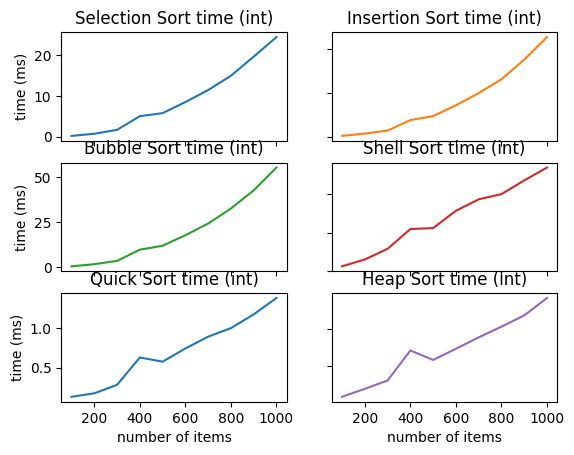

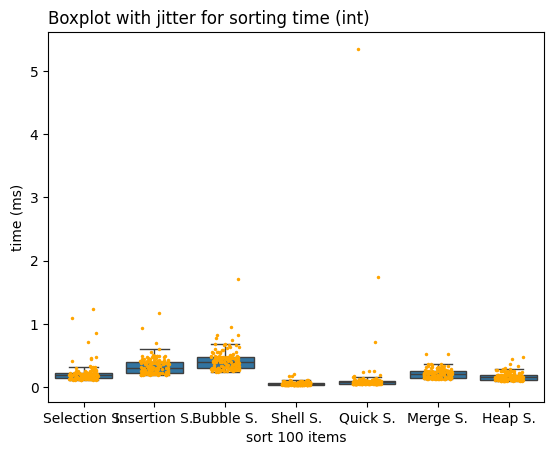

In [19]:
items = [(i+1)*100 for i in range(10)]

fig, axs = plt.subplots(3,2)
axs[0, 0].plot(items, sumSelectionS)
axs[0, 0].set_title('Selection Sort time (int)')

axs[0, 1].plot(items, sumInsertionS, 'tab:orange')
axs[0, 1].set_title('Insertion Sort time (int)')

axs[1, 0].plot(items, sumBubbleS, 'tab:green')
axs[1, 0].set_title('Bubble Sort time (int)')

axs[1, 1].plot(items, sumShellS, 'tab:red')
axs[1, 1].set_title('Shell Sort time (int)')

axs[2, 0].plot(items, sumQuickS, 'tab:blue')
axs[2, 0].set_title('Quick Sort time (int)')

axs[2, 1].plot(items, sumHeapS, 'tab:purple')
axs[2, 1].set_title('Heap Sort time (int)')

for ax in axs.flat:
    ax.set(xlabel='number of items', ylabel='time (ms)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig1 = plt.figure("Box Plot, int")

if (itemsBP > 0 and itemsBP % 100 == 0 and itemsBP < 1100):
    timeSelectionS = np.array(timeSelectionS)
    timeInsertionS = np.array(timeInsertionS)
    timeBubbleS = np.array(timeBubbleS)
    timeShellS = np.array(timeShellS)
    timeQuickS = np.array(timeQuickS)
    timeMergeS = np.array(timeMergeS)
    timeHeapS = np.array(timeHeapS)

    # Dataset:
    a1 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Selection S.',tests), 'time (ms)': timeSelectionS })
    a2 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Insertion S.',tests), 'time (ms)': timeInsertionS })
    a3 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Bubble S.',tests), 'time (ms)': timeBubbleS })
    a4 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Shell S.',tests), 'time (ms)': timeShellS })
    a5 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Quick S.',tests), 'time (ms)': timeQuickS })
    a6 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Merge S.',tests), 'time (ms)': timeMergeS })
    a7 = pd.DataFrame({ f'sort {itemsBP} items' : np.repeat('Heap S.',tests), 'time (ms)': timeHeapS })
    
    df = pd.concat([a1, a2, a3, a4, a5, a6, a7])

    # boxplot
    ax = sns.boxplot(x=f'sort {itemsBP} items', y='time (ms)', data=df, showfliers=False)
    # add stripplot
    ax = sns.stripplot(x=f'sort {itemsBP} items', y='time (ms)', data=df, color="orange", jitter=0.2, size=2.5)

    # add title
    plt.title("Boxplot with jitter for sorting time (int)", loc="left")

    # show the graph
    plt.show()

Ένα πρώτο πράγμα που μας φάνηκε ιδιαίτερα ενδιαφέρον ήταν η απουσία απομονωμένων σημείων στο κάτω μέρος του κάθε θηκογράμματος. Ένα πρόχειρο συμπέρασμα που θα μπορούσε να βγάλει κανείς θα ήταν ότι οι συναρτήσεις ταξινόμησης είναι φτιαγμένες για να λειτουργούν στην περιοχή που λειτουργούν καλά.

Στα παρακάτω χρονογράμματα παρουσιάζεται ο μέσος χρόνος ταξινόμησης των λιστών-`struct`, για κάθε μία από τις μεθόδους ταξινόμησης.

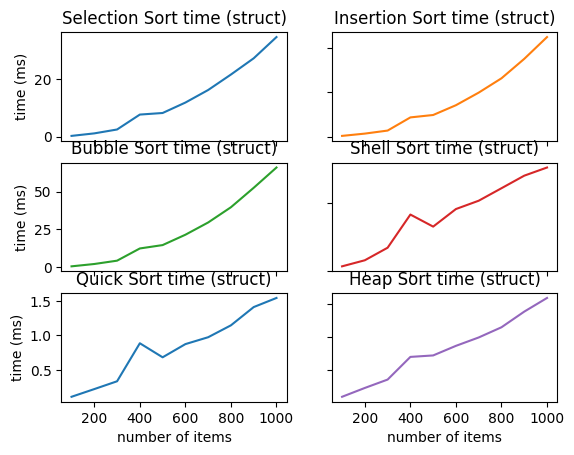

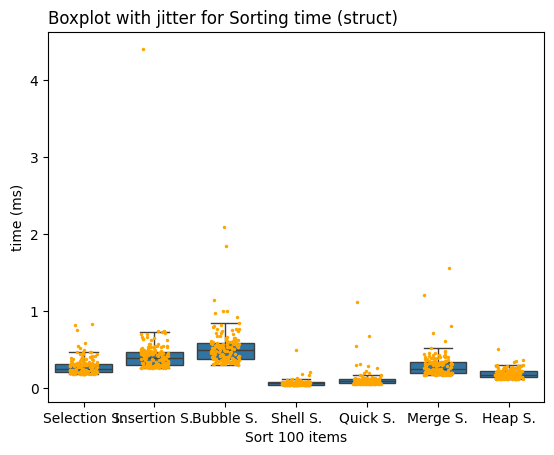

In [21]:
items = [(i+1)*100 for i in range(10)]

fig, axs = plt.subplots(3,2)
axs[0, 0].plot(items, sumSelection_struct_S)
axs[0, 0].set_title('Selection Sort time (struct)')

axs[0, 1].plot(items, sumInsertion_struct_S, 'tab:orange')
axs[0, 1].set_title('Insertion Sort time (struct)')

axs[1, 0].plot(items, sumBubble_struct_S, 'tab:green')
axs[1, 0].set_title('Bubble Sort time (struct)')

axs[1, 1].plot(items, sumShell_struct_S, 'tab:red')
axs[1, 1].set_title('Shell Sort time (struct)')

axs[2, 0].plot(items, sumQuick_struct_S, 'tab:blue')
axs[2, 0].set_title('Quick Sort time (struct)')

axs[2, 1].plot(items, sumHeap_struct_S, 'tab:purple')
axs[2, 1].set_title('Heap Sort time (struct)')

for ax in axs.flat:
    ax.set(xlabel='number of items', ylabel='time (ms)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig1 = plt.figure("Box Plot, Struct")

if (itemsBP > 0 and itemsBP % 100 == 0 and itemsBP < 1100):
    timeSelection_struct_S = np.array(timeSelection_struct_S)
    timeInsertion_struct_S = np.array(timeInsertion_struct_S)
    timeBubble_struct_S = np.array(timeBubble_struct_S)
    timeShell_struct_S = np.array(timeShell_struct_S)
    timeQuick_struct_S = np.array(timeQuick_struct_S)
    timeMerge_struct_S = np.array(timeMerge_struct_S)
    timeHeap_struct_S = np.array(timeHeap_struct_S)

    # Dataset:
    a1 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Selection S.',tests), 'time (ms)': timeSelection_struct_S })
    a2 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Insertion S.',tests), 'time (ms)': timeInsertion_struct_S })
    a3 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Bubble S.',tests), 'time (ms)': timeBubble_struct_S })
    a4 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Shell S.',tests), 'time (ms)': timeShell_struct_S })
    a5 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Quick S.',tests), 'time (ms)': timeQuick_struct_S })
    a6 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Merge S.',tests), 'time (ms)': timeMerge_struct_S })
    a7 = pd.DataFrame({ f'Sort {itemsBP} items' : np.repeat('Heap S.',tests), 'time (ms)': timeHeap_struct_S })
    
    df = pd.concat([a1, a2, a3, a4, a5, a6, a7])

    # boxplot
    ax = sns.boxplot(x=f'Sort {itemsBP} items', y='time (ms)', data=df, showfliers=False)
    # add stripplot
    ax = sns.stripplot(x=f'Sort {itemsBP} items', y='time (ms)', data=df, color="orange", jitter=0.2, size=2.5)

    # add title
    plt.title("Boxplot with jitter for Sorting time (struct)", loc="left")

    # show the graph
    plt.show()

Η χρονική συμπεριφορά είναι παρόμοια, όπως εύκολα διαπιστώνει κανείς, με την ταξινόμηση των λιστών-`int`. 

Στα παραπάνω θηκογράμματα παρουσιάζονται οι χρόνοι που χρειάστηκε κάθε μία από τις συναρτήσεις ταξινόμησης για να ταξινομήσει μια 100-μελή λίστα-`int` σε κάθε μία από τις 150 δοκιμές μας.

Κι εδώ παρατηρούμε ότι υπάρχουν μόνο απομονωμένα σημεία προς τα πάνω. Πέραν τούτου διαπιστώνουμε και πάλι την ύπαρξη ουκ ευκαταφρόνητης διασποράς. Αυτό μας οδηγεί στο συμπέρασμα ότι η ασφαλής σύγκριση των χρόνων ταξινόμησης για λίστες-`int` και λίστες-`struct`, θα μπορεί να επιτευχθεί μόνο αν αυτές οι δύο λίστες περιείχαν τους ίδιους ακεραίους.

Η εν λόγω σύγκριση αρχικά φαίνεται από το κάτωθεν διάγραμμα 
διασποράς.

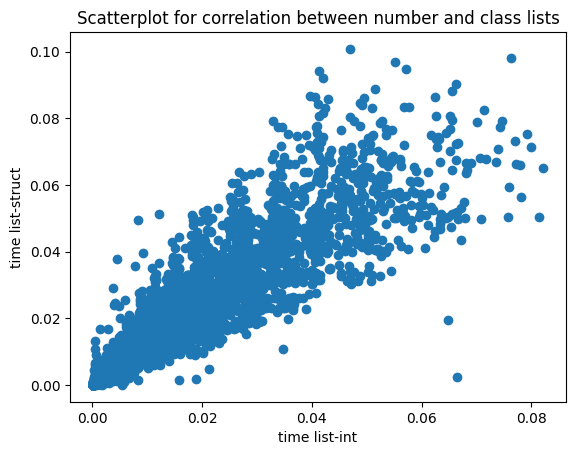

In [23]:
fig1 = plt.figure("Scatter plot, struct~int")
    
x = np.array(time_int)
y = np.array(time_struct)

plt.scatter(x, y)
plt.xlabel("time list-int")
plt.ylabel("time list-struct")
plt.title("Scatterplot for correlation between number and class lists")
plt.show()

Από το παραπάνω γράφημα διαπιστώνουμε μια έντονη γραμμική συσχέτιση μεταξύ των χρόνων ταξινόμησης λιστών-`int` και λιστών-`struct`. Θα τολμούσε κάποιος να πει πως οι χρόνοι ταξινόμησης λιστών-`int` και λιστών-`struct` είναι ποσά ανάλογα. Για να επαληθεύσουμε την εικασία αυτή υπολογίσαμε τον συντελεστή γραμμικής συσχέτισης Pearson και όντως αυτός έδειξε πολύ ισχυρή γραμμική συσχέτιση:

In [25]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(f"Pearson correlation coefficient = {r}")
print(f"p-value = {p}")
print(f"Standard error = {std_err}")

Pearson correlation coefficient = 0.9356977301966435
p-value = 0.0
Standard error = 0.004244275269653935


Η δε ευθεία γραμμικής παλινδρόμησης επαλήθευσε και την σκέψη μας ότι ίσως οι δύο χρόνοι είναι ποσά ανάλογα:

In [27]:
print(f"time_struct = {slope:1.3}time_int+{intercept:1.3}")

time_struct = 1.15time_int+0.000771
